# Dataset 빌드 및 통계

이 노트북은 아이콘 데이터셋의 train/val/test 분할과 각 split에 대한 coarse / fine 분포를 검증하고 시각화합니다.

## 개요

- 입력:
  - `dataset/icons/train_fine.csv`
  - `dataset/icons/val_fine.csv`
  - `dataset/icons/test_fine.csv`
  - `dataset/icons/train_val_test_split.json`
  - `dataset/icons/class_mapping_fine.json`
- 역할:
  - stratified split 결과 검증
  - class imbalance 정도 파악
  - YOLO / 분류 모델 설계 시 참고용 통계 산출

**원본 노트북**: `03_icon_dataset_build_and_stats.ipynb`


In [1]:
import os
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "dataset" / "icons"

print("BASE_DIR:", BASE_DIR)
print("DATA_DIR:", DATA_DIR)

BASE_DIR: /home/wsm/workspace/hit-archlens-project
DATA_DIR: /home/wsm/workspace/hit-archlens-project/dataset/icons


In [2]:
train_path = DATA_DIR / "train_fine.csv"
val_path = DATA_DIR / "val_fine.csv"
test_path = DATA_DIR / "test_fine.csv"

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

print("train:", df_train.shape)
print("val  :", df_val.shape)
print("test :", df_test.shape)

df_train.head()


train: (447, 4)
val  : (95, 4)
test : (97, 4)


,file_path,canonical_service_name,coarse_class,original_path
0,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...
1,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...
2,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...
3,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...
4,fine/amazon api gateway/Res_Amazon-API-Gateway...,amazon api gateway,Application Integration,Resource-Icons_02072025/Res_Networking-Content...


In [3]:
split_json_path = DATA_DIR / "train_val_test_split.json"
split_stats = json.loads(split_json_path.read_text(encoding="utf-8"))

split_stats

{'train': {'count': 447,
  'coarse_distribution': {'Storage': 61,
   'Database': 50,
   'Networking': 43,
   'Analytics': 31,
   'Management & Governance': 29,
   'Compute': 29,
   'AI & Machine Learning': 29,
   'IoT': 27,
   'Business Applications': 26,
   'Migration & Transfer': 20,
   'Monitoring & Logging': 20,
   'Security & Identity': 16,
   'Application Integration': 14,
   'Containers & Orchestration': 13,
   'Serverless & Event-driven': 13,
   'Quantum': 12,
   'Robotics / AR-VR': 6,
   'DevOps & Developer Tools': 5,
   'Blockchain': 3},
  'fine_distribution': {'amazon s3': 20,
   'amazon vpc': 18,
   'amazon sagemaker': 17,
   'amazon fsx': 17,
   'amazon ec2': 15,
   'amazon aurora': 14,
   'aws systems manager': 14,
   'amazon braket': 12,
   'aws iot greengrass': 12,
   'amazon connect': 11,
   'amazon eks': 10,
   'amazon rds': 10,
   'aws backup': 10,
   'amazon cloudwatch': 9,
   'amazon eventbridge': 9,
   'amazon dynamodb': 9,
   'aws waf': 8,
   'amazon redshift': 8

In [4]:
def count_summary(df, name):
    print(f"=== {name} ===")
    print("total:", len(df))
    print("coarse_class nunique:", df["coarse_class"].nunique())
    print("fine nunique:", df["canonical_service_name"].nunique())
    print()

count_summary(df_train, "train")
count_summary(df_val, "val")
count_summary(df_test, "test")


=== train ===
total: 447
coarse_class nunique: 19
fine nunique: 64

=== val ===
total: 95
coarse_class nunique: 19
fine nunique: 51

=== test ===
total: 97
coarse_class nunique: 19
fine nunique: 54



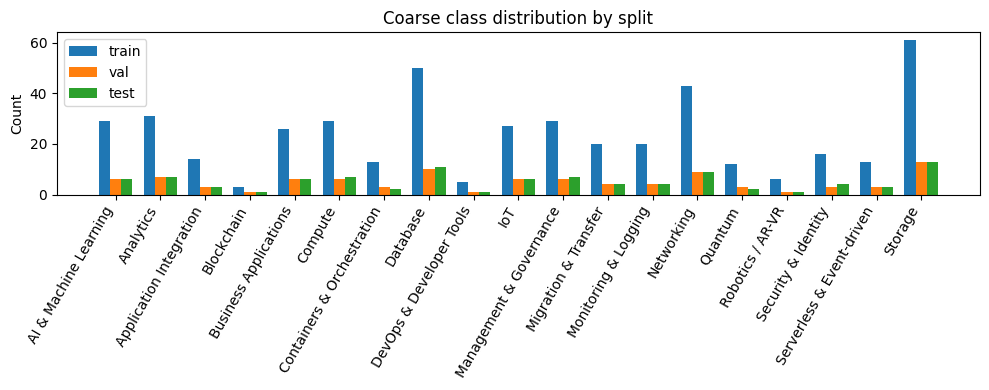

In [5]:
def plot_coarse_distribution(dfs, names):
    plt.figure(figsize=(10, 4))
    all_coarse = sorted(set().union(*[df["coarse_class"].unique() for df in dfs]))
    bar_width = 0.25
    x = range(len(all_coarse))

    for i, (df, name) in enumerate(zip(dfs, names)):
        counts = df["coarse_class"].value_counts()
        heights = [counts.get(c, 0) for c in all_coarse]
        xs = [xi + i * bar_width for xi in x]
        plt.bar(xs, heights, width=bar_width, label=name)

    plt.xticks([xi + bar_width for xi in x], all_coarse, rotation=60, ha="right")
    plt.ylabel("Count")
    plt.title("Coarse class distribution by split")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_coarse_distribution([df_train, df_val, df_test], ["train", "val", "test"])


In [6]:
def show_fine_stats(df, name, top_n=15):
    print(f"=== {name} fine class counts ===")
    counts = df["canonical_service_name"].value_counts()
    print("total fine classes:", len(counts))
    print("\n[Top classes]")
    display(counts.head(top_n))
    print("\n[Bottom classes]")
    display(counts.tail(top_n))

show_fine_stats(df_train, "train")
show_fine_stats(df_val, "val")
show_fine_stats(df_test, "test")


=== train fine class counts ===
total fine classes: 64

[Top classes]


canonical_service_name
amazon s3              20
amazon vpc             18
amazon sagemaker       17
amazon fsx             17
amazon ec2             15
amazon aurora          14
aws systems manager    14
amazon braket          12
aws iot greengrass     12
amazon connect         11
amazon eks             10
amazon rds             10
aws backup             10
amazon cloudwatch       9
amazon eventbridge      9
Name: count, dtype: int64


[Bottom classes]


canonical_service_name
aws database migration service    4
aws direct connect                4
aws lambda                        4
aws batch                         4
amazon comprehend                 4
aws cloudtrail                    4
amazon ecs                        3
amazon workdocs                   3
amazon textract                   3
amazon managed blockchain         3
amazon documentdb                 3
aws security hub                  3
aws license manager               3
aws lake formation                3
aws transit gateway               3
Name: count, dtype: int64

=== val fine class counts ===
total fine classes: 51

[Top classes]


canonical_service_name
aws backup                   7
amazon fsx                   4
amazon cloudwatch            3
amazon opensearch service    3
amazon comprehend            3
amazon lightsail             3
aws systems manager          3
amazon workdocs              3
amazon vpc                   3
amazon redshift              3
amazon braket                3
aws glue                     3
aws iot greengrass           3
aws iot sitewise             3
amazon eventbridge           2
Name: count, dtype: int64


[Bottom classes]


canonical_service_name
aws direct connect     1
aws datasync           1
aws cloudtrail         1
aws cloudformation     1
aws cloud map          1
amazon s3              1
aws lake formation     1
aws robomaker          1
aws organizations      1
aws license manager    1
aws lambda             1
aws transfer family    1
aws transit gateway    1
aws trusted advisor    1
aws waf                1
Name: count, dtype: int64

=== test fine class counts ===
total fine classes: 54

[Top classes]


canonical_service_name
amazon ec2             6
amazon s3              4
aws backup             4
aws iot analytics      4
amazon dynamodb        3
amazon aurora          3
amazon sagemaker       3
amazon route 53        3
aws systems manager    3
aws storage gateway    3
amazon cloudwatch      3
amazon eventbridge     2
aws security hub       2
aws waf                2
aws app mesh           2
Name: count, dtype: int64


[Bottom classes]


canonical_service_name
aws database migration service    1
aws config                        1
aws cloudformation                1
aws batch                         1
aws cloud map                     1
amazon textract                   1
amazon workspaces                 1
aws robomaker                     1
aws lambda                        1
aws iot sitewise                  1
aws lake formation                1
aws iot core                      1
aws snowball                      1
aws transfer family               1
elastic load balancing            1
Name: count, dtype: int64

In [7]:
class_mapping_fine_path = DATA_DIR / "class_mapping_fine.json"
mapping_fine = json.loads(class_mapping_fine_path.read_text(encoding="utf-8"))

fine_to_id = mapping_fine["fine_to_id"]

print("fine_to_id 예시 10개:")
list(fine_to_id.items())[:10]


fine_to_id 예시 10개:


[('amazon api gateway', 0),
 ('amazon athena', 1),
 ('amazon aurora', 2),
 ('amazon braket', 3),
 ('amazon chime', 4),
 ('amazon cloudwatch', 5),
 ('amazon comprehend', 6),
 ('amazon connect', 7),
 ('amazon documentdb', 8),
 ('amazon dynamodb', 9)]

In [8]:
def attach_fine_id(df):
    df = df.copy()
    df["fine_id"] = df["canonical_service_name"].map(fine_to_id)
    if df["fine_id"].isna().any():
        missing = df[df["fine_id"].isna()]["canonical_service_name"].unique()
        print("[WARN] fine_to_id 매핑 안된 서비스:", missing)
    return df

df_train_id = attach_fine_id(df_train)
df_val_id = attach_fine_id(df_val)
df_test_id = attach_fine_id(df_test)

df_train_id.head()


,file_path,canonical_service_name,coarse_class,original_path,fine_id
0,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...,0
1,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...,0
2,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...,0
3,fine/amazon api gateway/Arch_Amazon-API-Gatewa...,amazon api gateway,Application Integration,Architecture-Service-Icons_02072025/Arch_Netwo...,0
4,fine/amazon api gateway/Res_Amazon-API-Gateway...,amazon api gateway,Application Integration,Resource-Icons_02072025/Res_Networking-Content...,0


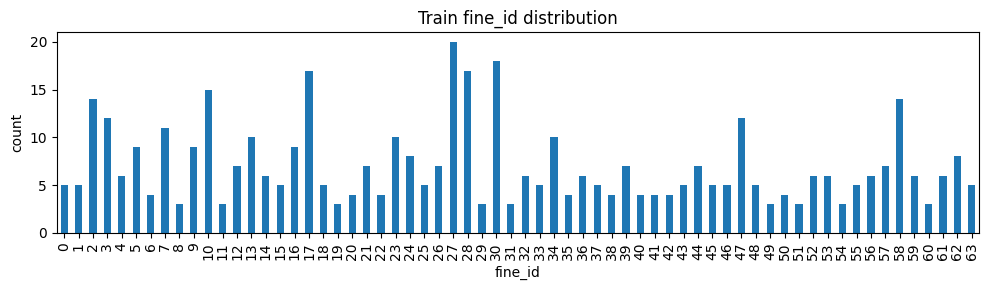

In [9]:
plt.figure(figsize=(10, 3))
df_train_id["fine_id"].value_counts().sort_index().plot(kind="bar")
plt.title("Train fine_id distribution")
plt.xlabel("fine_id")
plt.ylabel("count")
plt.tight_layout()
plt.show()


In [10]:
# yolo_fine_names.yaml 을 이용해 최종 dataset.yaml 골격 만들기
yolo_names_path = DATA_DIR / "yolo_fine_names.yaml"
yolo_names_text = yolo_names_path.read_text(encoding="utf-8")

dataset_yaml = f"""# Auto-generated YOLO dataset config for AWS icons (fine level)

path: {DATA_DIR.as_posix()}
train: images/train
val: images/val
test: images/test

{yolo_names_text}
"""

out_path = DATA_DIR / "aws_icons_fine_dataset.yaml"
out_path.write_text(dataset_yaml, encoding="utf-8")
print(f"[OK] YOLO dataset.yaml 저장: {out_path}")
print(dataset_yaml)


[OK] YOLO dataset.yaml 저장: /home/wsm/workspace/hit-archlens-project/dataset/icons/aws_icons_fine_dataset.yaml
# Auto-generated YOLO dataset config for AWS icons (fine level)

path: /home/wsm/workspace/hit-archlens-project/dataset/icons
train: images/train
val: images/val
test: images/test

names:
  0: amazon api gateway
  1: amazon athena
  2: amazon aurora
  3: amazon braket
  4: amazon chime
  5: amazon cloudwatch
  6: amazon comprehend
  7: amazon connect
  8: amazon documentdb
  9: amazon dynamodb
  10: amazon ec2
  11: amazon ecs
  12: amazon efs
  13: amazon eks
  14: amazon elasticache
  15: amazon emr
  16: amazon eventbridge
  17: amazon fsx
  18: amazon lightsail
  19: amazon managed blockchain
  20: amazon mq
  21: amazon opensearch service
  22: amazon quicksight
  23: amazon rds
  24: amazon redshift
  25: amazon rekognition
  26: amazon route 53
  27: amazon s3
  28: amazon sagemaker
  29: amazon textract
  30: amazon vpc
  31: amazon workdocs
  32: amazon workspaces
  33